<a href="https://colab.research.google.com/github/ysugiyama3/google_colab/blob/master/yale_dup_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Yale University Library duplicate search program**

by Yukari Sugiyama

---
This program automatically searches the Yale OPAC for title based on ISBN found in a base spreadsheet.

#### **What you need**
Excel spreadsheet in which contains 5 columns “TITLE”, “AUTHOR”, “PUBLISHER”, “YEAR”, and “ISBN” in that order.

#### **How to run the program**
Execute each step by simply clicking the play button.

---

In [ ]:
#@title 1. Upload an input Excel file

from google.colab import files
import pandas as pd
import requests
import json
from IPython.display import HTML, display
import time
import re

def progress(value, max=50000):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 40%'
        >
            {value}
        </progress>
        <br>{value}/{max}</br>
    """.format(value=value, max=max))

def clean_isbn(isbn):
    if isbn is None or pd.isnull(isbn):
        isbn = None
    elif len(str(isbn)) > 0:
        isbn = str(isbn)
        isbn = re.sub(r'[\(|\:|\.].*', '', isbn)
        isbn = re.sub(r'[^0-9Xx]', '', isbn) 
    else:
        isbn = None
    return isbn

def search_opac(isbn):
    global output_df, held
    bib = ''
    note = ''
    callno = ''
    status = ''
    if isbn is None or pd.isnull(isbn):
        note = 'Check manually'
    else:
        url = 'http://libapp.library.yale.edu/VoySearch/GetBibItem?isxn=' + str(isbn)
        r = requests.get(url)
        result = json.loads(r.text)
        records= result['record']
        record = records[0]
        bib = record['bibid']
        try:          
          items = record['items']
          item = items[0]
          callno = item['callno']
          status = item['itemstatus']
          note = 'Held'
          held += 1
        except:
            if bib == '0':
                bib = ''
                note = 'Check manually'
            else:
                note = 'Held'
                held += 1
    output_df = output_df.append(pd.Series([title, author, publisher, year, isbn, note, bib, callno, status], index=output_df.columns ), ignore_index=True)  

# Upload an input Excel file
uploaded = files.upload()
input_name = str(list(uploaded.keys())[0])

# Read an input Excel file into a pandas DataFrame
input_df = pd.read_excel(input_name)

# Convert YEAR to int64
input_df['YEAR'] = input_df['YEAR'].astype('int64')

# Create an output Excel file based on input excel file
output_name = input_name.rsplit( ".", 1 )[0] + "_output.xlsx"

# Create an output DataFrame
output_df = pd.DataFrame(columns = ['TITLE', 'AUTHOR', 'PUBLISHER', 'YEAR', 'ISBN', 'NOTE', 'BIB_ID', 'CALL_NO', 'STATUS'])

# number of rows
total = len(input_df.index)

Saving dup_test_1.xlsx to dup_test_1.xlsx


In [ ]:
#@title 2. Run the dup search program

# count
count = 0
held = 0

out = display(progress(0, total), display_id=True)

for index, row in input_df.iterrows():
    count += 1
    time.sleep(0.02)
    out.update(progress(count, total))

    title = row[0]
    author = row[1]
    publisher = row[2]
    year = row[3]
    isbn = row[4]
    isbn = clean_isbn(isbn)

    search_opac(isbn)

print('Done!')

Done!


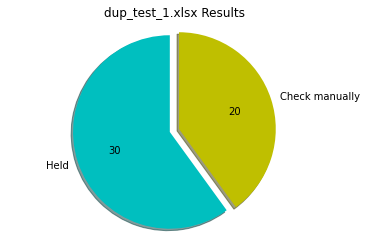

In [ ]:
#@title 3. Preview results

import matplotlib.pyplot as plt

labels = 'Held', 'Check manually'
sizes = [held, total-held]
colors = ['c', 'y']
explode = (0.1, 0.0)

total = sum(sizes)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda s: '{:.0f}'.format(s * total / 100), shadow=True, startangle=90)

plt.axis('equal') 
plt.title(input_name + ' Results')
plt.show()


In [ ]:
#@title 4. Export results
try:
    output_df.to_excel(output_name, index=False)
except:
    output_name = output_name.rsplit( ".", 1 )[0] + '.csv'
    output_df.to_csv(output_name, index=False, encoding='utf-8')
print('Done!\U0001f600')

Done!😀
